## 交叉熵
### 信息量
一条信息的信息量大小和它的不确定性有很大的关系
$I(x_0) = -log(p(x_0)),0<=p(x_0)<=1$

In [3]:
from d2l import torch as d2l
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

D:\software\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


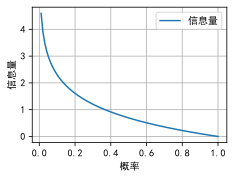

In [7]:
x = np.linspace(0,1,100)
I = -np.log(x)

d2l.plot(x,I,'概率','信息量',['信息量'])

### Entropy熵
熵是表示随机变量不确定的度量，是对所有可能发生的事件产生的信息量的期望。

$H(x) = -\sum_{i=1}^n p(x_i)log(p(x_i))$

例如抛硬币
$H(x) = -\sum_{i=1}^n p(x_i)log(p(x_i)) \\
      = -p(x)log(p(x)) - (1-p(x))log(1-p(x))$

In [ ]:
x = np.linspace(0,1,100)
I = -np.log(x)

d2l.plot(x,I,'概率','信息量',['信息量'])

### 相对熵Relative entropy
相对熵也称为KL散度(Kullback-Leibler divergence)，表示同一个随机变量的两个不同分布间的距离。
$D_{KL}(p||q) = \sum{p(x_i)log(\frac{p(x_i)}{q(x_i)})}$

- 如果$p,q$两个分布相同，其相对熵=0
- $D_{KL}(p||q) \neq D_{KL}(q||p)$
- $D_{KL}(p||q) >= 0$

总的来说，相对熵是用来衡量同一个随机变量的两个不同分布之间的距离。在实际应用中，假如p(x)是目标真实的分布，而q(x)是预测得来的分布，为了让这两个分布尽可能的相同的，就需要最小化KL散度。

### 交叉熵 Cross Entropy
设 p(x),q(x) 分别是 离散随机变量X的两个概率分布，其中p(x)是目标分布，p和q的交叉熵可以看做是，使用分布q(x) 表示目标分布p(x)的困难程度：
$H(p,q) = \sum_i^n p(x_i) log \frac{1}{log q(x_i)}= - \sum_i p(x_i)log q(x_i)$

将熵，相对熵，交叉熵放在一起
熵：$H(x) = -\sum_{i=1}^n p(x_i)log(p(x_i))$

相对熵：$D_{KL}(p||q) = \sum{p(x_i)log(\frac{p(x_i)}{q(x_i)})}$

交叉熵：$H(p,q) = \sum_i^n p(x_i) log \frac{1}{log q(x_i)}= - \sum_i p(x_i)log q(x_i)$

综合以上公式可得：
$D_{KL}(p,q) = H(p,q) - H(p)$

目标的分布p(x)通常是训练数据的分布是固定，即H（p）是一个常量。这样两个分布的交叉熵H(p,q) 也就等价于最小化这两个分布的相对熵DKL(p∥q)。

设p(x) 是目标分布（训练数据的分布），我们的目标的就让训练得到的分布q(x)尽可能的接近p(x)，这时候就可以最小化DKL(p∥q)，等价于最小化交叉熵H(p,q) 。